# Programación imperativa

En general, existen dos maneras fundamentalmente distintas de programar:

- **Programación imperativa**: los programas consisten en series de instrucciones
  que indican a la computadora qué hacer y cómo hacerlo.
- **Programación declarativa**: los programas consisten en descripciones de hechos
  y problemas que deben ser resueltos.
  El cómo se resuelven estos problemas queda a cargo de la computadora.

Históricamente los lenguajes de programación han evolucionado mediante
abstracciones que permiten expresar conceptos de manera más simple comenzando
por la máquina y terminando en el problema a resolver, de manera que los
lenguajes imperativos han sido los más utilizados hasta el momento, aunque
últimamente los lenguajes declarativos han ganado gran popularidad.

En este módulo vamos a aprender diferentes conceptos de la programación
imperativa y en el próximo módulo vamos a aprender los conceptos de la
programación declarativa; solo hay que tomar en cuenta que el buen programador
usa ambos tipos de lenguajes y sus distintos paradigmas como una caja de
herramientas para resolver los problemas que se le presenten.

## 1. Identificadores

### 1.1. Identificadores y objetos denotables


Quizá la abstracción de datos más importante que se ha hecho en la programación
imperativa es la de **identificador** o **nombre**.
Los identificadores son cadenas de caracteres que se utilizan para referirse a
**objetos denotables** en el lenguaje de programación.

Un objeto denotable es básicamente cualquier cosa que se pueda construir en
lenguaje de programación, por ejemplo, un número, una cadena de caracteres, una
lista, una función, etc. siempre que el lenguaje te permita construirlo y
asignarle un nombre.

Es importante mencionar que los identificadores no son los objetos que denotan,
sino que son una manera de referirse a ellos. 

**Notación** Usamos las *metavariables* (variables que representan variables)
`foo`, `bar`, `baz`, `qux`, `quux`, para referirnos a identificadores arbitrarios.
Estas son de uso común en la literatura de programación.

**Ejemplo** En Python los nombres son *etiquetas* que se colocan sobre objetos.
Puedes pensar en ellas como notas post-it que se pegan sobre los objetos que 
identifican, y que además los puedes cambiar de objeto cuando quieras.

<img src="img/variablespostit.svg" height="256" />


In [83]:
# En Python todos los objetos denotables tienen un número identificador
# único mientras existen en la memoria.
id("Hola")

140358594442800

Cuando dos variables se refieren al mismo objeto, se dice que son *alias* una
de la otra.

In [84]:
# Colocamos foo sobre la cadena "Jamón" y bar sobre la misma cadena
bar = "Calculadora"
print(f"{bar=} hace referencia al objeto {id(bar)=}")
foo = "Jamón"
print(f"{foo=} hace referencia al objeto {id(foo)=}")
bar = foo  # bar es un alias de foo
print(f"{bar=} hace referencia al objeto {id(bar)=}")
# Movemos foo a otra cadena
foo = "Monja"
print(f"{foo=} hace referencia al objeto {id(foo)=}")
print(f"{bar=} hace referencia al objeto {id(bar)=}")
bar = "Tortas"  # Aquí ya no hay referencias al jamón
bar = "Jamón"
print(f"{bar=} hace referencia al objeto {id(bar)=}")

bar='Calculadora' hace referencia al objeto id(bar)=140358523328176
foo='Jamón' hace referencia al objeto id(foo)=140359591381232
bar='Jamón' hace referencia al objeto id(bar)=140359591381232
foo='Monja' hace referencia al objeto id(foo)=140358523124976
bar='Jamón' hace referencia al objeto id(bar)=140359591381232
bar='Jamón' hace referencia al objeto id(bar)=140358487182992


In [85]:
# Este es un error muy común entre los programadores novatos que aún no
# entienden cómo funciona la asignación de variables en Python.
foo = [1, 2, 3]
print(f"{foo=}")

bar = foo  # bar hace referencia la misma lista que foo
print(f"{bar=}")

print("Modificamos foo...")
foo.append(4)
print(f"{foo=}")
print(f"{bar=}")  # bar también se modifica!

foo=[1, 2, 3]
bar=[1, 2, 3]
Modificamos foo...
foo=[1, 2, 3, 4]
bar=[1, 2, 3, 4]


En los lenguajes de programación imperativos no cualquier cadena de caracteres
es un identificador ni todos los identificadores son variables.
- Los identificadores están delimitados por la sintaxis del lenguaje.
- Las palabras reservadas del lenguaje no pueden ser usadas como
  identificadores.
- Algunos identificadores son provistos por el lenguaje y en general no se
  pueden modificar.


In [86]:
# En Python, los identificadores pueden tener letras UNICODE, dígitos y
# guiones bajos, pero no pueden comenzar con un dígito.
perrito1 = "🐶"
_toro_malo95 = "🐱"
δ = 0.0001
未知 = [...]

In [87]:
# Estas variables están prohibidas en Python. Producen un SyntaxError
# 1perrito = "Hola"
# 🐶 = "Guau"

A pesar de que en teoría es posible que un lenguaje de programación permita
usar cualquier cadena de caracteres como identificador, en la práctica solo se
recomienda usar identificadores escritos en inglés.

Python tiene 35 palabras reservadas que no pueden ser usadas como
identificadores:
1. `False`
1. `None`
1. `True`
1. `and`
1. `as`
1. `assert`
1. `async`
1. `await`
1. `break`
1. `class`
1. `continue`
1. `def`
1. `del`
1. `elif`
1. `else`
1. `except`
1. `finally`
1. `for`
1. `from`
1. `global`
1. `if`
1. `import`
1. `in`
1. `is`
1. `lambda`
1. `nonlocal`
1. `not`
1. `or`
1. `pass`
1. `raise`
1. `return`
1. `try`
1. `while`
1. `with`
1. `yield`

**Definición**: El conjunto de identificadores accesibles desde una instrucción
concreta durante la ejecución de un programa es su **entorno de referencia** o
simplemente el **entorno**.

In [88]:
# En Python, el entorno de referencia es un diccionario que mapea
# nombres de variables locales y globales a objetos.
globals() | locals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  '# En Python todos los objetos denotables tienen un número identificador\n# único mientras existen en la memoria.\nid("Hola")',
  '# Colocamos foo sobre la cadena "Jamón" y bar sobre la misma cadena\nbar = "Calculadora"\nprint(f"{bar=} hace referencia al objeto {id(bar)=}")\nfoo = "Jamón"\nprint(f"{foo=} hace referencia al objeto {id(foo)=}")\nbar = foo  # bar es un alias de foo\nprint(f"{bar=} hace referencia al objeto {id(bar)=}")\n# Movemos foo a otra cadena\nfoo = "Monja"\nprint(f"{foo=} hace referencia al objeto {id(foo)=}")\nprint(f"{bar=} hace referencia al objeto {id(bar)=}")\nbar = "Tortas"  # Aquí ya no hay referencias al jamón\nbar = "Jamón"\nprint(f"{bar=} hace referencia al objeto {id(bar)=}")',
  '

La *declaración* de un identificador es la instrucción que lo introduce en el
entorno de referencia.
Existen dos tipos:
- La *declaración implícita* es la que se hace al asignarle un valor a un
  identificador por primera vez.
- La *declaración explícita* es la que se hace con una instrucción especial
  para declarar identificadores, como `var` en JavaScript.

In [89]:
# Python usa la declaración implícita:
baz = 42
print(f"{baz=}")

baz=42


| Lenguaje   | Tipo de declaración | Ejemplo      |
|------------|---------------------|--------------|
| Python     | Implícita           | `x = 1`      |
| C++        | Explícita           | `int x = 1;` |
| Java       | Explícita           | `int x = 1;` |
| JavaScript | Implícita           | `x = 1`      |
| R          | Implícita           | `x <- 1`     |

Algunos lenguajes también ofrecen una instrucción para *eliminar* un
identificador del entorno de referencia.
Por ejemplo, Python usa `del foo` para eliminar el identificador `foo`, y
JavaScript usa `delete foo`.

In [90]:
foo = "Defenestrar"
bar = foo
del foo  # Borramos el nombre foo, no el objeto al que hacía referencia
# print(foo)  # Esta instrucción produce un NameError
print(bar)  # bar sigue existiendo

Defenestrar


### 1.2 Expresiones y sentencias

**Definiciones**:
- Un **literal** es un objeto denotable que se puede representar directamente en
  el código fuente, como números y cadenas de caracteres.
- Un **operador** es un símbolo que representa una operación sobre uno o más
  objetos denotables, como `+` y `*`.
- Una **expresión** es una combinación de identificadores, operadores y
  literales que puede ser evaluada para obtener un valor.
  Por ejemplo, `1 + 2` es una expresión que se evalúa a `3`, y `x + 1` es una
  expresión cuyo valor depende del valor del identificador `x`.
- Una **sentencia** es una instrucción que puede ser ejecutada para producir un
  efecto en el entorno de referencia o en el sistema.
  Por ejemplo, `x = 1` es una sentencia que asigna el valor `1` al identificador
  `x`, y `print(x)` es una sentencia que imprime el valor del identificador `x`
  en la salida estándar.

Los identificadores se usan para referirse a objetos denotables; estos objetos
se suelen construir usando expresiones y se manipulan mediante sentencias.

In [91]:
resultado = print("¿Cuál es el resultado de la función print?")

¿Cuál es el resultado de la función print?


In [92]:
print(resultado)

None


#### Literales

Los literales son los objetos denotables más simples que *no* son
identificadores.
Estos se representan directamente en el código fuente.
Python soporta los siguientes tipos de literales:
- Números enteros no negativos (de cualquier tamaño)
- Números de punto flotante (de precisión doble)
- Números imaginarios
- Cadenas de caracteres
- Bytes

In [93]:
99999999999999999999999999999

99999999999999999999999999999

In [94]:
# Enteros en binario, comienzan con el prefijo 0b
0b1011101011101010000110101011010101010011

802791535955

In [95]:
# Enteros en octal, comienzan con el prefijo 0o
0o76543210

16434824

In [96]:
# Enteros en hexadecimal, comienzan con el prefijo 0x
0xFEDCBA9876543210

18364758544493064720

In [97]:
# Números de punto flotante
3.1415926535897932384626433832795028841971693993751058209749445923078164

3.141592653589793

In [98]:
42j  # Números imaginarios

42j

In [99]:
"¡Me amarraron como puerco!"  # Cadenas de texto

'¡Me amarraron como puerco!'

In [100]:
b"Soy una cadena de bytes bip-bop-bip."  # Cadenas de bytes

b'Soy una cadena de bytes bip-bop-bip.'

In [101]:
# Observa que un solo caracter puede requerir más de un byte
cadena = "¡Python 🐍 está cañón!"
bytes_ = cadena.encode("utf8")  # Codificamos la cadena en UTF-8
print(f"{cadena=}")
print(f"{bytes_=}")
print(f"La cadena tiene {len(cadena)} caracteres, pero {len(bytes_)} bytes.")
if len(cadena) < len(bytes_):
    print("¡Hay caracteres que requieren más de un byte!")

# Cada byte es un entero entre 0 y 255
for caracter in cadena:
    print(f"{caracter!r} ⟼", *caracter.encode("utf8"))

cadena='¡Python 🐍 está cañón!'
bytes_=b'\xc2\xa1Python \xf0\x9f\x90\x8d est\xc3\xa1 ca\xc3\xb1\xc3\xb3n!'
La cadena tiene 21 caracteres, pero 28 bytes.
¡Hay caracteres que requieren más de un byte!
'¡' ⟼ 194 161
'P' ⟼ 80
'y' ⟼ 121
't' ⟼ 116
'h' ⟼ 104
'o' ⟼ 111
'n' ⟼ 110
' ' ⟼ 32
'🐍' ⟼ 240 159 144 141
' ' ⟼ 32
'e' ⟼ 101
's' ⟼ 115
't' ⟼ 116
'á' ⟼ 195 161
' ' ⟼ 32
'c' ⟼ 99
'a' ⟼ 97
'ñ' ⟼ 195 177
'ó' ⟼ 195 179
'n' ⟼ 110
'!' ⟼ 33


#### Operadores

Los operadores son símbolos que representan una operación sobre uno o más
objetos denotables.
Esencialmente, son los que te permiten usar un lenguaje de programación para
calcular cosas.

In [102]:
(50 - 5 * (5 + 1)) / 7

2.857142857142857

Nótese que esta misma expresión en otros lenguajes como C++ o Java da como
resultado un número entero, ya que en estos lenguajes la división de enteros
produce un entero.

**Actividad** Averiguar cómo calcular $(50 - 5\,(5 + 1)) / 7$ en C++.
¿Basta con declarar el resultado como `double` así?
```cpp
double resultado = (50 - 5 * (5 + 1)) / 7;
```

Al revés, si queremos usar la división entera en Python, podemos usar el
operador `//` en lugar de `/`.

In [103]:
81 // 7  # División entera

11

Algunos lenguajes admiten un operador para calcular potencias, como `**` en
Python.
- En R, Excel, y BASIC se usa `x^y`.
- Fortran, Python, JavaScript y PHP usan `x**y`.
- Algol y variantes antiguas de BASIC usaban `x↑y`.
- Haskell usa `x^^y`.
- APL utiliza `x*y`.
- C, C++, Java, C#, Rust y otros no tienen un operador para calcular potencias,
  y dependen de una función definida en una biblioteca estándar.
  Por ejemplo, en C++ se usa `std::pow(x, y)`.

In [104]:
2**16 + 1

65537

In [105]:
# La función pow() es equivalente al operador **
pow(2, 16) + 1

65537.0

Algunos operadores son unarios, es decir, solo operan sobre un objeto denotable,
por ejemplo, el operador de negación aritmética `-` es unario.

In [106]:
-91  # Esto no es un literal, es una expresión unaria

-91

In [107]:
# ¿No me crees? ¡Pues mira el Abstract Syntax Tree!
import ast

print(ast.dump(ast.parse("-91", mode="eval")))

Expression(body=UnaryOp(op=USub(), operand=Constant(value=91)))


In [108]:
# True es un identificador (y palabra reservada) que hace referencia a
# una constante booleana.

print(f"{True and False=}")  # Operador lógico AND
print(f"{True or False=}")  # Operador lógico OR
print(f"{not True=}")  # Operador lógico NOT

True and False=False
True or False=True
not True=False


Al respecto de estos operadores, es importante aclarar la manera en que
funcionan.

**Definición** (de operadores de cortocircuito)
- Una expresión `expr` es **verdaderosa** (*truthy*) si `bool(expr)` es `True`.
- Una expresión `expr` es **falsosa** (*falsy* )si `bool(expr)` es `False`.
- Si `x` es verdaderosa, entonces `x or y` se evalúa a `x` (y `y` no se evalúa),
  de lo contrario `x or y` se evalúa a `y`.
- Si `x` es falsosa, entonces `x and y` se evalúa a `x` (y `y` no se evalúa),
  de lo contrario `x and y` se evalúa a `y`.

In [109]:
# La cadena vacía es falsosa, cualquier otra cadena es verdaderosa
print(f"{bool('')=}")
print(f"{bool('False')=}")  # "False" es no vacía, y es verdaderosa

bool('')=False
bool('False')=True


Es muy común entre los programadores experimentados usar los operadores de
cortocircuito para escribir expresiones más cortas, legibles, y seguras.
Por ejemplo el siguiente código en Python produce un error cuando la cadena
`foo` es vacía:
```python
if foo[0] == "A":  # IndexError si foo es vacía porque foo[0] no existe
    ...
```

Para correjirlo, podemos usar el operador de cortocircuito `and`:
```python
if foo and foo[0] == "A":  # Si foo es vacía entonces foo[0] no se evalúa
    ...
```


Como segundo ejemplo considera que se desea concatenar la cadena `foo` con
`bar` o `baz`; una de estas dos cadenas es vacía y la otra no.
```python
if bar:
    foo += bar
else:
    foo += baz
```
Usando el operador de cortocircuito `or` podemos escribirlo de manera más
concisa:
```python
foo += bar or baz
``` 

In [110]:
foo = "Cara"
bar = ""  # Cambia esto por "cola"
baz = "mbola"

foo + (bar or baz)

'Carambola'

**Actividad** Determinar en qué casos los siguientes tipos de datos son
verdaderosos o falsosos en Python:
- Números enteros
- Números de punto flotante
- Números complejos
- ~~Cadenas de caracteres~~ (Respuesta: falsosas si y solo si son vacías)
- Listas
- None

In [111]:
from math import nan, inf
print(f"{bool(0)=}")  # El cero es falsoso
print(f"{bool(-1)=}")  # Cualquier otro entero es verdaderoso
print(f"{bool(0.0)=}")  # El 0.0 es falsoso
print(f"{bool(3.14)=}")  # Cualquier otro número es verdaderoso
print(f"{bool(inf)=}")  # ... incluyendo el infinito
print(f"{bool(nan)=}")  # ... y también el NaN (Not a Number)
print(f"{bool(1+1j)=}")  # Los números complejos son verdaderosos
print(f"{bool(0+0j)=}")  # ...excepto el cero complejo
print(f"{bool([1, 2, 3])=}")  # Las listas no vacías son verdaderosas
print(f"{bool([])=}")  # Las listas vacías son falsosas
print(f"{bool([[]])=}")  # Observa que esta lista no está vacía
print(f"{bool(None)=}")  # None es falsoso
print(f"{bool(...)=}")  # ... es verdaderoso
print(f"{bool()=}")  # *Nada* es falsoso


bool(0)=False
bool(-1)=True
bool(0.0)=False
bool(3.14)=True
bool(inf)=True
bool(nan)=True
bool(1+1j)=True
bool(0+0j)=False
bool([1, 2, 3])=True
bool([])=False
bool([[]])=True
bool(None)=False
bool(...)=True
bool()=False


En C, C++, Java, C#, y otros lenguajes, los operadores de cortocircuito son
`&&` y `||`.

Además de los operadores lógicos de cortocircuito, los lenguajes de
programación imperativos suelen tener operadores lógicos binarios que operan
bit a bit.

In [112]:
0b101 & 0b010  # 5 AND 2

0

In [113]:
0b101 | 0b010  # 5 OR 2

7

In [114]:
0b101 ^ 0b010  # 5 XOR 2

7

In [115]:
# Negación. Los números se representan en complemento a 2
~0b101

-6

In [116]:
0b10100000 >> 1  # Desplazamiento a la derecha (división por 2)

80

In [117]:
print(f"{_:b}")

1010000


In [118]:
0b10100000 << 2  # Desplazamiento a la izquierda (multiplicación por 2)

640

In [119]:
print(f"{_:b}")

1010000000


In [120]:
"Una cosa" == "Otra cosa"  # Operador de igualdad

False

In [121]:
foo = "Una cosa"
bar = foo

foo is bar  # Operador de identidad

True

In [122]:
foo = [1, 2, 3]
bar = [1, 2, 3]

print(f"{foo == bar=}")
print(f"{foo is bar=}")

foo == bar=True
foo is bar=False


Python en particular incluye un operator de multiplicación de matrices `@`.
Dado que Python no tiene sopoerte nativo para matrices, este operador está
definido en la biblioteca no estándar `numpy`.

In [123]:
import numpy as np

A = np.random.randint(0, 100, size=(3, 3))
B = np.random.randint(0, 100, size=(3, 3))
print(f"{A=}")
print(f"{B=}")
print(f"{A@B=}")

A=array([[66, 24, 35],
       [75, 67, 52],
       [14, 81, 98]])
B=array([[64, 90, 92],
       [35, 84, 16],
       [94, 64, 14]])
A@B=array([[ 8354, 10196,  6946],
       [12033, 15706,  8700],
       [12943, 14336,  3956]])


El **operador ternario** `foo if cond else bar` se evalúa a `foo` si `cond` es
verdaderosa, y a `bar` si `cond` es falsosa.

In [124]:
# Ejemplo de operador ternario
edad = 15
vehiculo = "moto" if edad >= 16 else "bici"
print(f"Súbete a mi {vehiculo} 🎶")

Súbete a mi bici 🎶


En lenguajes como C, C++, Java, C#, y otros, el operador ternario se escribe
como `cond ? foo : bar`.

La **llamada a función** es un operador que se usa para llamar a una función
con los argumentos que recibe.
En casi todos los lengujes de programación, la llamada a función se representa
con paréntesis, por ejemplo, `f(x)` llama a la función `f` con el argumento `x`.
Veremos más sobre funciones en la siguiente sección.

In [125]:
abs(-42)  # Valor absoluto

42

El operador de subíndice `[]` se usa para acceder a los elementos de un objeto
denotable que representa una colección, como una cadena de caracteres o una
lista.

In [126]:
"¿Y mis 50000 pesos qué!"[1]

'Y'

#### Expresiones

- Un literal es una expresión que se evalúa a sí misma.
- Un identificador es una expresión que se evalúa al objeto denotado por el
  identificador.
- Una expresión que combina operadores, identificadores y literales se evalúa
  de acuerdo a las reglas de precedencia y asociatividad de los operadores.

## 2. Estructuras de control

### 2.1 Programación no estructurada

Recordemos que la programación imperativa evolucionó a partir del lenguaje
máquina:

- La máquina tiene **contador de programa** que indica el número de instrucción
  (posición en la memoria) que se ejecutará a continuación.
- Cuando se termina de ejecutar una instrucción, el contador de programa se
  incrementa en uno a menos que la instrucción sea una **instrucción de
  salto**, en cuyo caso el valor cambia al que la instrucción de salto indique.

En los lenguajes de programación imperativos modernos, esta instrucción de salto
se conoce como `goto` y se utiliza para saltar a una instrucción arbitraria del
programa, generalmente indicada por una etiqueta.
Al tipo de programación que abusa de la instrucción `goto` se le conoce como
**programación no estructurada**.


**Ejemplo**  En C++ las etiquetas se indican con el símbolo `:`.
Consideremos el siguiente programa escrito en C++ que imprime los
números de Fibonacci menores o iguales a un número `n_max` dado por el usuario.
Las variables `i` y `j` se declaran explícitamente como enteros, y contienen dos
números consecutivos de la sucesión de Fibonacci.
Podemos observar que el programa tiene tres etiquetas: `loop`, `iterate` y
`exit`:

```C++
#include <iostream>

int main() {
  int n_max, i = 1, j = 0;
  std::cout << "n = ";
  std::cin >> n_max;

loop:
  if (j <= n_max) goto iterate;
  goto exit;

iterate:
  std::cout << j << " ";
  j += i;
  i = j - i;
  goto loop;

exit:
  std::cout << std::endl;
  return 0;
}
```

**Actividad**: Usar el depurador de Visual Studio Code para ejecutar el programa
anterior paso a paso y seguir el flujo de ejecución.

Muchos lenguajes de programación modernos como Python y JavaScript no
implementan la instrucción `goto` porque se considera una **mala práctica de
programación**.
Ya en 1966 se sabía que la instrucción  `goto` es innecesaria para construir
cualquier programa (veremos este resultado en la siguiente subsección), pero en
1968 se publicó un influyente ensayo titulado [*Go To Statement Considered
Harmful*][1] donde Edsger Dijkstra critica el esta instrucción `goto` porque
produce código ilegible, que en terminología moderna conocemos popularmente como
[*código espagueti*](https://en.wikipedia.org/wiki/Spaghetti_code).

[1]: https://doi.org/10.1145/362929.362947

En la programación no estructurada el entorno de referencia son todas los
identificadores que se han declarado hasta el momento de la ejecución de una
instrucción.

### 2.2 La programación estructurada

En 1957 [FORTRAN](https://en.wikipedia.org/wiki/Fortran) se convirtió el primer
lenguaje de programación en no depender de la instrucción `goto` para construir
programas.
El truco estaba en la capacidad de organizar el código en **bloques** y usar
**estructuras de control** para controlar el flujo de ejecución del programa.

**Definición** (de bloques de código) Un **bloque de código** se define
recursivamente de la siguiente manera:
- Una instrucción es un bloque de código por sí misma.
- **Estructura secuencial**: Si $A$ y $B$ son bloques de código, entonces
  “$A$`; `$B$” es el bloque de código que ejecuta $A$ y después ejecuta $B$.
- **Estructura condicional**: Si $c$ es una expresión booleana y $A$ un bloque
  de código, entonces “`si` $c$ `entonces` $A$ `fin`” es el bloque de código que
  ejecuta $A$ si y sólo si $c$ es verdadera.
- **Estructura iterativa**: Si $c$ es una expresión booleana y $A$ un bloque de
  código, entonces “`mientras` $c$ `hacer` $A$ `fin`” es el bloque de código que
  ejecuta $A$ mientras $c$ sea verdadera.
  

#### La estructura secuencial

La estructura más simple de todas es la evolución natural de que el contador
de programa se incremente en uno después de ejecutar una instrucción: las 
instrucciones se ejecutan una detrás de otra en el orden en que aparecen.
Para separar las instrucciones en bloques de código se usa algún símbolo como el
punto y coma `;` en C++ o el salto de línea en Python.

Si $B_1$, $B_2$, $\ldots$, $B_n$ son bloques de código, entonces la estructura
secuencial tiene la siguiente forma:

- $B_1$`;`
- $B_2$`;`
- $\quad\vdots$
- $B_n$`;`

En particular, si cada bloque de código es una instrucción, se vería así:

- $\textit{instrucción}_1$
- $\textit{instrucción}_2$
- $\qquad\vdots$
- $\textit{instrucción}_n$

Algunos lenguajes de programación incluso tienen símbolos especiales para
agrupar instrucciones en bloques de código:
- Las palabras `begin` y `end` se usan ALGOL, Pascal, Ada y otros.
- Las llaves `{` y `}` se usan en los descendientes del lenguaje B (C, C++,
  Java, JavaScript, C#, etc.).


**Actividad** En el siguiente programa escrito en C++; `std::cout` se usa para
imprimir en la terminal, y `std::endl` representa un salto de línea.
Determina qué imprime el programa y por qué.


```C++
#include <iostream>
int foo = 1;

void bloque_d() {
  // Bloque D
  std::cout << "Bloque D: foo=" << foo << std::endl;  
}

int main() {
  // Bloque A
  std::cout << "Bloque A: foo=" << foo << std::endl;
  int foo = 2;

  {
    // Bloque B
    int foo = 3;
    std::cout << "Bloque B: foo=" << foo << std::endl;
  }

  {
    // Bloque C
    std::cout << "Bloque C: foo=" << foo << std::endl;
  }

  bloque_d();  // Llamada a la función bloque_d

  std::cout << "Bloque A: foo=" << foo << std::endl;
  return 0;
}
```

#### La estructura condicional

La estructura condicional evoluciona a partir de las instrucciones de salto
condicional del lenguaje máquina, en donde el contador de programa cambia al
valor de una etiqueta si y sólo si una condición es verdadera.

Si $c$ es una expresión booleana y $B$ un bloque de código, entonces la
estructura condicional tiene la siguiente forma:

- `si` $\mathit{c}$ `entonces`
  - $\mathit{B}$`;`

Es equivalente al siguiente pseudocódigo que usa la instrucción “`vaya a`”
(*goto*) y la etiqueta $L$:

- `si` $\neg\mathit{c}$ `entonces vaya a` $L$`;`
- $B$`;`
- $L: \ldots$

**Actividad** Explorar la estructura condicional en Python y sus variantes.

In [127]:
edad = 18
if edad > 18:
    print("Vamos por unas chelas.")
elif edad > 16:
    print("Vamos a dar un paseo en coche.")
else:
    print("Vamos por un Yakult.")

Vamos a dar un paseo en coche.


In [128]:
estado = "MTY"
match estado:
    case "MOR":
        print("Eres guayabo.")
    case "CDMX":
        print("Eres chilango.")
    case "AGS":
        print("Eres hidrocálido.")
    case "GRO":
        print("Eres guerrerense.")
    case "MTY":
        print("Eres regiomontano.")
    case _:
        print("Eres del interior, provinciano.")

Eres regiomontano.


#### La estructura iterativa

La estructura iterativa evoluciona a partir de las instrucciones de salto
condicional que apuntan a una instrucción anterior, de manera que el contador de
programa regresa a un valor menor.

Si $c$ es una expresión booleana y $B$ un bloque de código, entonces la
estructura iterativa tiene la siguiente forma:

- `mientras` $\mathit{c}$ `haga`
  - $\mathit{B}$`;`

Es equivalente al siguiente pseudocódigo que usa la instrucción “`vaya a`”
(*goto*) y las etiquetas $L$ y $M$:

- $L:$ `si` $\neg\mathit{c}$ `entonces vaya a` $M$`;`
- $B$`;`
- `vaya a` $L$`;`
- $M: \ldots$

**Actividad** Explorar la estructura iterativa en Python y sus variantes.

In [129]:
edad = 15
while edad < 18:
    print(f"Tienes {edad}; vamos por un Yakult.")
    print("Esperamos un año.")
    edad += 1
print("Vamos por una chela.")

Tienes 15; vamos por un Yakult.
Esperamos un año.
Tienes 16; vamos por un Yakult.
Esperamos un año.
Tienes 17; vamos por un Yakult.
Esperamos un año.
Vamos por una chela.


In [130]:
list(range(10, 18))

[10, 11, 12, 13, 14, 15, 16, 17]

In [131]:
for edad in range(10, 18):
    print(f"Tienes {edad}; vamos por un Yakult.")
print("Vamos por una chela.")

Tienes 10; vamos por un Yakult.
Tienes 11; vamos por un Yakult.
Tienes 12; vamos por un Yakult.
Tienes 13; vamos por un Yakult.
Tienes 14; vamos por un Yakult.
Tienes 15; vamos por un Yakult.
Tienes 16; vamos por un Yakult.
Tienes 17; vamos por un Yakult.
Vamos por una chela.


In [132]:
for edad in range(99):
    if edad < 1:
        continue
    if edad >= 18:
        print(f"Tienes {edad}; vamos por una chela.")
        break
    print(f"Tienes {edad}; vamos por un Yakult.")

Tienes 1; vamos por un Yakult.
Tienes 2; vamos por un Yakult.
Tienes 3; vamos por un Yakult.
Tienes 4; vamos por un Yakult.
Tienes 5; vamos por un Yakult.
Tienes 6; vamos por un Yakult.
Tienes 7; vamos por un Yakult.
Tienes 8; vamos por un Yakult.
Tienes 9; vamos por un Yakult.
Tienes 10; vamos por un Yakult.
Tienes 11; vamos por un Yakult.
Tienes 12; vamos por un Yakult.
Tienes 13; vamos por un Yakult.
Tienes 14; vamos por un Yakult.
Tienes 15; vamos por un Yakult.
Tienes 16; vamos por un Yakult.
Tienes 17; vamos por un Yakult.
Tienes 18; vamos por una chela.


#### El Teorema del programa estructurado

En [1966 Böhm y Jacopini][1] demostraron matemáticamente que cualquier programa
se puede escribir, al menos en principio, usando únicamente las estructuras de
control secuencial, condicional e iterativa.
Este resultado es completamente teóríco, pues las transformaciones que usan para
convertir un programa no estructurado en uno que sí es estructurado lo vuelven
aún más ilegible que el programa original.

[1]: https://dl.acm.org/doi/10.1145/355592.365646

El teorma de Böhm y Jacopini se refiere concretamente a [diagramas de flujo][1],
pero se puede extender de forma natural a cualquier lenguaje de programación.
Específicamente demostraron que cualquier diagrama de flujo se puede convertir
a otro equivalente que tiene solamente estos tres artefactos con sus respectivas
representaciones gráficas:

![Diagramas de estructuras de control](img/Structured_program_patterns.svg)

[1]: https://en.wikipedia.org/wiki/Flowchart

A este resultado famoso se conoce como el **Teorema del programa estructurado**
y muchos argumentan que es la justificación teórica de que la programación no
estructurada es innecesaria.
En la práctica se sabe que en algunos *muy raros* casos, la instrucción `goto`
no solamente hace al programa más eficiente, sino más legible.

En lo particular, como docente de programación, no recomiendo usar la
instrucción `goto` a menos que tengas muchos años de experiencia programando y
una muy buena razón para hacerlo.
Antes de escribir ese `goto` pregúntate si la eficiencia que ganas es
significativa y si no perderás legibilidad en el proceso.



### 2.3 Estructuras de control adicionales

Aunque el teorema del programa estructurado establece solo tres estructuras de
control, en la práctica los lenguajes de programación modernos tienen muchas
más que son de gran utilidad.

#### Funciones

Las funciones son bloques de código que han sido encapsulados como una unidad
para realizar una tarea específica.
Usualmente las funciones tienen un nombre y pueden recibir parámetros de entrada
y regresar un valor de salida, es decir, son una abstracción de algoritmo.

La notación de funciones es usualmente la misma que las funciones matemáticas:
el nombre de la función seguido de paréntesis que contienen los parámetros de
entrada separados por comas.
Al evaluar una función, se sustituyen los parámetros de entrada por los valores
que se le pasan a la función, y se evalúa el bloque de código, y la salida
sustituye la llamada a la función.

In [133]:
# Importamos coseno y pi del módulo math
from math import cos, pi

cos(pi / 4) + 1

1.7071067811865475

En Python las funciones se declaran con la palabra `def` seguida del nombre de
la función y una lista de parámetros entre paréntesis, y terminando con dos
puntos `:`. El cuerpo de la función se escribe indentado con cuatro espacios.
Asimismo, la primera línea del cuerpo de la función puede ser una cadena de
caracteres que se usa como documentación de la función.

In [134]:
def fib(n):
    """Imprime la sucesión de Fibonacci hasta n."""
    i, j = 1, 0
    while j < n:
        print(j, end=" ")
        i, j = j, i + j
    print()

In [135]:
resultado = fib(1000)

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 


**Terminología** Existen varios tipos de *funciones* en programación dependiendo
de su salida, alcance y efectos secundarios:
- **Función**: Es una función que regresa un valor.
  Este valor puede ser calculado a partir de cero o más parámetros de entrada.
  Una función que calcula el valor de la constante pi sigue esta definición, así
  como también la función coseno.
- **Subrutina**: Es una función que no regresa un valor.
  Se usa para realizar una tarea específica que altera el estado del programa
  o del sistema, pero que no calcula un valor; por ejemplo, imprimir un mensaje
  en la terminal o asegurarse de que un archivo exista.
- **Método**: Es una función o subrutina que pertenece a un objeto.
  Usualmente se denota con $x.f(\ldots)$ donde $x$ es el objeto y $f$ es el
  método.
  Por ejemplo, en Python las cadenas de caracteres tienen un método `upper` que
  regresa una copia de la cadena en mayúsculas (`"Hola".upper()`).
  Esta función es específica de las cadenas de caracteres y no de cualquier
  objeto.

Se puede observar que el ejemplo anterior era una *subrutina*.
Si intentamos quitar el cero del resultado anterior haciendo algo como
```python
resultado.remove(0)  # Usamos el método remove de las listas
```
obtenemos un `AttributeError` porque, de hecho, `resultado` no es una lista,
sino `None`.
En Python, `None` es el objeto que representa la ausencia de valor, y es el
valor de retorno de las funciones que no regresan nada.

In [136]:
type(resultado)

NoneType

Podemos corregir el programa anterior haciendo que la función `fibonacci`
regrese una lista en lugar de imprimirla.
Se usa la sentencia `return` para regresar un valor de una función como se
muestra a continuación:

In [137]:
# Ejemplo de función con anotaciones de tipo (opcionales)
def fib(n: int) -> list[int]:
    """Devuelve la sucesión de Fibonacci hasta n."""
    i, j, resultado = 1, 0, []
    while j < n:
        resultado.append(j)  # Agregamos j a la lista resultado
        i, j = j, i + j
    return resultado


resultado = fib(1000)
print(resultado)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]


In [138]:
resultado.remove(0)  # Eliminamos el cero con el método remove
print(resultado)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]


In [139]:
resultado.index(144)  # El m. index encuentra el índice de un elemento

11

**Actividad** Buscar la sintaxis de funciones en JavaScript, R y C++.
¿Puedes convertir el programa anterior en una función en estos lenguajes?

#### Manejo de excepciones

Las excepciones son errores que ocurren durante la ejecución de un programa,
como dividir entre cero, abrir un archivo que no existe, usar un identificador
que no ha sido declarado, etc.

Muchos lenguajes de programación modernos tienen una estructura de control para
manejar las excepciones; usualmente consta de dos o tres partes:
- El bloque *intentar* contiene el código inseguro que puede generar una
  excepción.
- El bloque *atrapar* contiene el código que se ejecuta cuando se genera una
- excepción.
- El bloque *finalmente* es opcional, y contiene el código que se ejecuta
  siempre, ya sea que se haya generado una excepción o no.

En Python esta estructura de control se llama `try`.

In [140]:
while True:
    try:  # Código protegido:
        edad = int(input("¿Cuántos años tienes? "))
    except ValueError:  # Manejo de excepciones:
        print("Eso no es un número. Intenta de nuevo.")
    else:  # Código que se ejecuta si no hay excepciones (desprotegido):
        print("¡Qué viej@ estás!")
        break  # Salimos del ciclo

¡Qué viej@ estás!


Para lanzar una excepción se usa la instrucción `raise` seguida de un objeto
que representa la excepción.

In [141]:
malo = 3  # Intenta cambiar este valor a 0 o 15
try:
    for i in range(1, 10):
        if i == malo:
            raise ValueError("¡No me gusta ese número!")
        print(i / malo)
except ValueError as error:
    print("Se produjo este error:", error)
except ZeroDivisionError as error:
    print("No puedes dividir entre cero.")
else:
    print("Todo salió bien.")

0.3333333333333333
0.6666666666666666
Se produjo este error: ¡No me gusta ese número!


C++ tiene una estructura de control similar llamada `try`.
Para lanzar una excepción se usa la instrucción `throw` seguida de un número
entero que representa la excepción.

```C++
try {
  int edad = 15;
  if (edad >= 18) {
    cout << "Caite con las chelas.";
  } else {
    throw (edad);  // Lanzar una excepción
  }
}
catch (int codigoDeError) {
  cout << "No puedes tomar chelas a los" << codigoDeError << " años.";
} 
```

Java, JavaScript, C# y otros lenguajes tienen la misma sintaxis que C++, solo
hay diferencia en los tipos de datos que se pueden usar como excepciones.
- En Java y C#, las excepciones deben ser subclases de la clase `Exception`.
- En JavaScript, las excepciones pueden ser cualquier objeto.

El lenguaje C no tiene una estructura de control para manejar excepciones, pero
tiene una función llamada `setjmp` que se usa para definir un punto de retorno
en el programa, y una función llamada `longjmp` que se usa para saltar a ese
punto de retorno.
Esencialmente, estas funciones implementan la estructura de control `try`
mediante el uso de `goto`.

**Actividad** Convierte los ejemplos anteriores a JavaScript y pruébalos en el
navegador.

#### Contextos de ejecución

Python tiene una estructura de control llamada `with` que se usa para crear
**contextos de ejecución**; estos son bloques de código en los que el entorno
de referencia se modifica de manera temporal.

In [142]:
# NO HAGAS ESTO!!!
# Para abrir un archivo usamos la función open()
archivo = open("img/variablespostit.svg")
contenido = archivo.read(100)
archivo.close()  # A la banda se le olvida cerrar el archivo

In [143]:
# MEJOR HAZ ESTO EN SU LUGAR:
with open("img/variablespostit.svg") as archivo:
    # El archivo se cierra automáticamente al salir del bloque with
    contenido = archivo.read(100)

### 2.4 Módulos y bibliotecas 

Toda vez que un lenguaje de programación permite definir funciones y subrutinas,
los programas se conciben como funciones que se llaman unas a otras para
realizar una tarea específica.
Pero entonces veremos que unas funciones son demasiado comunes y que se usan en
muchos programas, por lo que es conveniente empaquetarlas en un lugar accesible
para todos los programas que las necesiten.

**Definición** Una **biblioteca** (*library*) es una colección de funciones y
otros objetos denotables que se pueden incluir en programa mediante un sistema
de importación.


En lenguaje C, las bibliotecas se incluyen con la instrucción `#include`.
Esto hace que el preprocesador del lenguaje copie y pegue el contenido de la
biblioteca en el programa antes de compilarlo.
En Python, cualquier archivo `foo.py` es una biblioteca que se puede importar
con la instrucción `import foo`.

In [144]:
# La biblioteca estándar de Python incluye un módulo math para
# funciones matemáticas
import math

In [145]:
help(math)

Help on built-in module math:

NAME
    math

DESCRIPTION
    This module provides access to the mathematical functions
    defined by the C standard.

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
        
        The result is between 0 and pi.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    asin(x, /)
        Return the arc sine (measured in radians) of x.
        
        The result is between -pi/2 and pi/2.
    
    asinh(x, /)
        Return the inverse hyperbolic sine of x.
    
    atan(x, /)
        Return the arc tangent (measured in radians) of x.
        
        The result is between -pi/2 and pi/2.
    
    atan2(y, x, /)
        Return the arc tangent (measured in radians) of y/x.
        
        Unlike atan(y/x), the signs of both x and y are considered.
    
    atanh(x, /)
        Return the inverse hyperbolic tangent of x.
    
    cbrt(x, /)
        Return the cube root of x.
    
    ceil(x, /)

Los módulos definen **espacios de nombres**, es decir, identificadores que
agrupan otros identificadores.
Por ejemplo, el módulo `math` de Python agrupa las funciones `sin`, `cos`,
`tan`, etc. así como las constantes `pi` y `e`.
Si `foo` es un identificador en el espacio de nombres `bar`, entonces se puede
acceder a él como `bar.foo` (el punto es el *operador de acceso a miembros* en
Python).

In [146]:
math.pi

3.141592653589793

In [147]:
math.cos(math.pi)

-1.0

También es posible importar solo algunos identificadores de un módulo.

In [148]:
from math import cos, pi

print(f"{cos(pi)=}")

cos(pi)=-1.0


In [149]:
from math import *  # Importa todo lo que hay en math

In [150]:
sin(pi/2)

1.0

Los espacios de nombres son una manera de evitar conflictos entre
identificadores, por ejemplo, si dos módulos `foo` y `bar` tienen una función
llamada `baz`, entonces se puede acceder a ellas de manera distinta mediante
`foo.baz` y `bar.baz`.

In [151]:
import cmath  # Módulo de funciones matemáticas complejas

math.cos
cmath.cos

<function cmath.cos(z, /)>

Cuando los programadores hablan acerca de la *programación estructurada* muchas
veces no sólo se refieren al uso de estructuras de control, sino a una
*metodología* de programación que aprovecha la modularización para el diseño
de programas que tiene las siguientes características:

- **Diseño descendente de programas**: Los programas se diseñan como una
  jerarquía de módulos en abstracto que iterativamente se refinan hasta llegar
  a un programa concreto.
- **Programación modular**: Las unidades del programa se agrupan en módulos que
  tienen una única funcionalidad.
  Es decir, todos los identificadores de un módulo tienen un propósito común.
- **Identificadores significativos**: Los identificadores se eligen de manera
  que sean descriptivos de su propósito.
  Por ejemplo, `area_rectangulo` es un identificador más significativo que `A`.
- **Documentación**: Todos los identificadores y módulos tienen documentación
  que describe su propósito y cómo se usan.
  El código tiene comentarios que explican el propósito de las partes más
  complejas.
- **Estructuras de control**: Se evita el código espagueti usando únicamente
  las estructuras de control del lenguaje.
- **Uso de estructuras de datos**: Como veremos en la siguiente sección, las
  estructuras de datos son una abstracción de datos que se usan para agrupar
  y abstraer datos complejos.

**Actividad** Escribir una biblioteca de cálculo de áreas y perímetros de
figuras geométricas en Python.

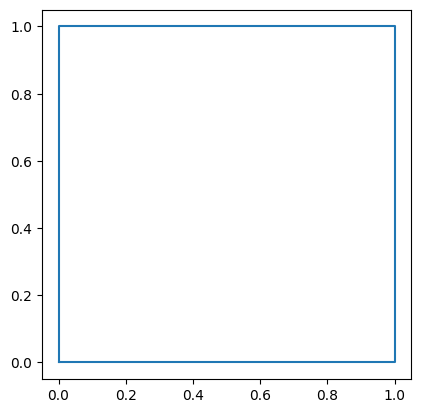

In [152]:
import geometria
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
geometria.dibujar_cuadrado(1, ax)
ax.set_aspect("equal", "box")

**Actividad** Repetir el ejercicio anterior en C++.

## 3. Estructurado de datos


### 3.1 Sistemas de tipos
**Definición** Un **tipo de dato** es un conjunto de valores homogéneos que
comparten una misma representación estructural en memoria, así como un conjunto
de operaciones que se pueden realizar sobre ellos.

Los tipos de datos se clasifican en dos grandes grupos:
- Los **tipos de datos escalares** son los tipos de datos más simples, que no
  resultan de, ni permiten la, combinación de otros datos.
  Por ejemplo, los números enteros, los números de punto flotante, los números
  complejos, las cadenas de caracteres, etc.
- Los **tipos de datos compuestos** son los que resultan de agrupar o combinar
  varios datos de uno o más tipos.
  Por ejemplo, las listas, los diccionarios, los conjuntos, etc.

**Definición** Un **sistema de tipos** es un conjunto de reglas que gobierna a
los tipos de datos de un lenguaje de programación:
- Los tipos de datos predefinidos en el lenguaje.
- Los mecanismos para definir nuevos tipos de datos.
- Las reglas para el control de tipos, es decir, su equivalencia, conversión e
  inferencia.
- Las restricciones dinámicas o estáticas que se imponen a los tipos de datos.

In [153]:
# La función type devuelve el tipo de un objeto.
# Estos son los tipos de datos primitivos en Python:
print(f"{type(128)=}")
print(f"{type(3.1416)=}")
print(f"{type('Hola')=}")
print(f"{type(b'Hola')=}")
print(f"{type(True)=}")
print(f"{type(None)=}")

type(128)=<class 'int'>
type(3.1416)=<class 'float'>
type('Hola')=<class 'str'>
type(b'Hola')=<class 'bytes'>
type(True)=<class 'bool'>
type(None)=<class 'NoneType'>


In [154]:
# Los tipos de datos compuestos contienen otros objetos:
print(f"{type(1+1j)=}")
z = 1 + 1j
print(f"{type(z.real)=}")
print(f"{type(z.imag)=}")

type(1+1j)=<class 'complex'>
type(z.real)=<class 'float'>
type(z.imag)=<class 'float'>


In [155]:
# Las listas también son tipos de datos compuestos:
lista = [1, 2, 3, []]
lista[0]

1

#### Tipados estático/dinámico y débil/fuerte

**Definición**(tipado estático y dinámico)
Un lenguaje de programación tiene **tipado estático** si las restricciones de
tipos se verifican en tiempo de compilación, es decir, antes de ejecutar el
programa, en caso contrario se dice que el lenguaje tiene **tipado dinámico**.

**Definición**(tipado fuerte y débil)
Un lenguaje de programación tiene **tipado fuerte** si no permite realizar
operaciones entre tipos de datos incompatibles, es decir, si no permite
conversión implícita entre tipos de datos, en caso contrario se dice que el
lenguaje tiene **tipado débil**.

In [156]:
# Python tiene tipado dinámico, pero fuerte.
# Esto significa que las variables no tienen tipo, pero los objetos sí.

foo = 42
print(f"{type(foo)=}")
foo = "Hola"
print(f"{type(foo)=}")

type(foo)=<class 'int'>
type(foo)=<class 'str'>


In [157]:
foo = 42
bar = "8"

try:
    foo + bar
except TypeError as error:
    print("Se produjo este error:", error)

Se produjo este error: unsupported operand type(s) for +: 'int' and 'str'


**Actividad** Determinar si C++ y JavaScript tienen tipado estático o dinámico,
y si tienen tipado fuerte o débil replicando nuestros ejemplos de Python.

### 3.2 Tipos de datos abstractos

Al programador experimentado le interesa más el *comportamiento* y *significado*
de los datos que su representación en memoria.
Por ejemplo, al diseñar catálogo para una biblioteca, es más útil pensar en
*libros* que tienen título, autor, fecha de publicación, etc., que en cadenas
de caracteres, números enteros, etc.
E inclusive algo tan simple como una fecha es la composición de tres números.


In [158]:
from datetime import date

hoy = date.today()
print(f"{type(hoy)=}")
print(f"{hoy=}")
print(hoy)

type(hoy)=<class 'datetime.date'>
hoy=datetime.date(2023, 10, 30)
2023-10-30


In [159]:
print(f"{hoy.year=}")
print(f"{hoy.month=}")
print(f"{hoy.day=}")

hoy.year=2023
hoy.month=10
hoy.day=30


In [160]:
# ¿Cuántos días duró la guerra de independencia de México?
inicio = date(1810, 9, 16)
fin = date(1821, 9, 27)
print(f"{fin - inicio=}")  # Operación entre fechas

fin - inicio=datetime.timedelta(days=4029)


#### Estructuras de datos

**Definición** Un **tipo de dato abstracto** es una clase de objetos cuyo
comportamiento está definido por un conjunto de valores posibles así como las
operaciones que se pueden realizar sobre ellos.

En el caso de los lenguajes imperativos, los tipos de datos abstractos se
implementan como **estructuras de datos**.

Python y JavaScript ofrecen la posibilidad de definir estructuras de datos
mediante *diccionarios* y *objetos* respectivamente.
Ambos tienen sintaxis similar, y se pueden usar para el mismo propósito.

In [161]:
mi_libro = {}
print(f"{type(mi_libro)=}")
mi_libro["titulo"] = "1984"
mi_libro["autor"] = "George Orwell"
mi_libro["fecha"] = {"dia": 8, "mes": 6, "año": 1949}
print(f"{mi_libro=}")

type(mi_libro)=<class 'dict'>
mi_libro={'titulo': '1984', 'autor': 'George Orwell', 'fecha': {'dia': 8, 'mes': 6, 'año': 1949}}


Para acceder a los elementos de un diccionario u objeto se usa el operador de
subíndice `[]` con la clave del elemento que se desea acceder:

In [162]:
print(f'{mi_libro["autor"]=}')
print(f'{mi_libro["titulo"]=}')
print(f'{mi_libro["fecha"]["año"]=}')

mi_libro["autor"]='George Orwell'
mi_libro["titulo"]='1984'
mi_libro["fecha"]["año"]=1949


Un diccionario es una herramienta muy apropiada cuando nuestra estructura de
datos aún no está bien definida, a lo mejor algunos elementos son opcionales o
se pueden agregar nuevos elementos en cualquier momento.
En cambio si nuestra estructura de datos está bien definida, es mejor usar lo
que en Python se conoce como *dataclass*:

In [163]:
from dataclasses import dataclass
from datetime import date


@dataclass
class Libro:
    """Datos bibliográficos de un libro."""
    titulo: str
    autor: str
    fecha: date

# Efectivamente, Libro es un nuevo tipo de dato:
print(f"{type(Libro)=}")

type(Libro)=<class 'type'>


In [164]:
# Para crear un Libro, usamos la estructura Libro como si fuese una
# función:
mi_libro = Libro("1984", "George Orwell", date(1949, 6, 8))
# El tipo de esta variable es Libro:
print(f"{type(mi_libro)=}")
print(f"{mi_libro=}")

# Para acceder a los atributos de un objeto, usamos la notación de
# punto; esto es, el operador de acceso a miembros:
print(f"{mi_libro.titulo=}")
print(f"{mi_libro.autor=}")
print(f"{mi_libro.fecha=}")

type(mi_libro)=<class '__main__.Libro'>
mi_libro=Libro(titulo='1984', autor='George Orwell', fecha=datetime.date(1949, 6, 8))
mi_libro.titulo='1984'
mi_libro.autor='George Orwell'
mi_libro.fecha=datetime.date(1949, 6, 8)


In [165]:
from operator import attrgetter

lista_de_libros = [
    Libro("El señor de las moscas", "William Golding", date(1954, 9, 17)),
    Libro("El señor de los anillos", "J.R.R. Tolkien", date(1954, 7, 29)),
    Libro("Las crónicas de Narnia", "C.S. Lewis", date(1950, 10, 16)),
    Libro("Harry Potter y la piedra filosofal", "J.K. Rowling", date(1997, 6, 26)),
    Libro("El llano en llamas", "Juan Rulfo", date(1953, 1, 1)),
    Libro("El Zarco", "Ignacio Manuel Altamirano", date(1901, 1, 1)),
    Libro(
        "El ingenioso hidalgo Don Quijote de La Mancha",
        "Miguel de Cervantes",
        date(1605, 1, 1),
    ),
]

# Ordenamos la lista de libros por fecha y título
lista_de_libros.sort(key=attrgetter("fecha", "titulo"))
for libro in lista_de_libros:
    print(f"{libro.fecha.year}: {libro.titulo}")

1605: El ingenioso hidalgo Don Quijote de La Mancha
1901: El Zarco
1950: Las crónicas de Narnia
1953: El llano en llamas
1954: El señor de los anillos
1954: El señor de las moscas
1997: Harry Potter y la piedra filosofal


#### Clases

Habrás notado que para definir una estructura de datos en Python usamos la
palabra `class` en lugar de `def`.
Esto es porque en Python no tiene soporte nativo para estructuras de datos, y
en cambio usa un mecanismo más general llamado **clases**.

In [166]:
class MiClase:
    """Ejemplo simple de una clase"""

    i = 12345

    def f(self):
        return "¡Hola, mundo!"

**Definición** Una **clase** es la definición de un tipo de dato
abstracto que consta de:

- **Atributos**: Los datos que componen el tipo de dato.
- **Métodos**: Las operaciones que se pueden realizar sobre los datos.

La clase encapsula los atributos y métodos en un solo bloque de código.

Un **objeto** es una instancia de una clase, es decir, un objeto es un valor
concreto de un tipo de dato abstracto.

A veces es difícil distinguir entre una clase y un objeto, pero sirve mucho
pensar en una clase como la abstracción ideal de todos los objetos de un mismo
tipo.
Mira a tu alrededor y verás que hay muchos objetos que son de la misma clase,
como tu computadora:
- Existe un concepto abstracto y general de computadora que solo existe en el
  mundo de las ideas: es aquel en el que piensas cuando te dicen la palabra
  *computadora*. Esta es una *clase* de objetos.
- Pero también existen computadoras concretas, como la que estás usando para
  leer este texto. Esta es una *instancia* concreta de la clase *computadora*,
  y es un *objeto* de la clase *computadora*.


**Ejemplo** La clase `Libro` tiene los atributos `titulo`, `autor` y `fecha`, y los métodos `prestar` y `devolver`. Un libro como "El señor
de los anillos" tiene muchas instancias distribuidas al rededor del
mundo. Cada libro particular es un *objeto* de la clase *libro*.

In [167]:
foo = MiClase()  # Instancia de la clase MiClase
print(f"{type(foo)=}")
print(f"{foo.i=}")
print(f"{type(foo.i)=}")
print(f"{foo.f()=}")

type(foo)=<class '__main__.MiClase'>
foo.i=12345
type(foo.i)=<class 'int'>
foo.f()='¡Hola, mundo!'


#### Caso de estudio: La lista doblemente ligada

Las estructuras de datos se suelen usar para representar datos muy complejos.
Uno de los primeros y más importantes tipos de datos abstractos es la **lista**,
que es una colección de datos ordenados.
Naturalmente Python ya tiene un tipo de datos abstracto para listas, pero vamos
a implementar una lista doblemente ligada para entender cómo funcionan las
estructuras de datos en otros lenguajes.

Primero observemos que si partimos una lista de manera arbitraria en cualquier
punto, obtenemos dos listas, más pequeñas, pero listas al fin y al cabo.
Luego entonces, decimos que la lista es un objeto *recursivo*, es decir, que se
puede definir en términos de sí misma:

- Una lista es una lista vacía, o
- una lista es un elemento seguido de una lista.

In [168]:
from dataclasses import dataclass
from typing import Any

@dataclass
class Lista:
    elemento: Any
    siguiente: "Lista | None" = None

In [169]:
frutas = Lista("Pera", None)
print(f"{frutas=}")
frutas.siguiente = Lista("Manzana", None)
print(f"{frutas=}")
frutas.siguiente.siguiente = Lista("Piña", None)
print(f"{frutas=}")

frutas=Lista(elemento='Pera', siguiente=None)
frutas=Lista(elemento='Pera', siguiente=Lista(elemento='Manzana', siguiente=None))
frutas=Lista(elemento='Pera', siguiente=Lista(elemento='Manzana', siguiente=Lista(elemento='Piña', siguiente=None)))


A este tipo de estructura se le conoce como *lista enlazada* o *lista ligada*, 
pues cada elemento de la lista contiene un enlace al elemento siguiente.
La *lista doblemente ligada* es una lista enlazada en la que cada elemento
contiene un enlace al elemento siguiente y al anterior.
Para facilitar la implementación, agregaremos un elemento ficticio *centinela*,
que no contiene ningún dato, pero marca el inicio y el final de la lista. 

In [170]:
from collections.abc import MutableSequence
from dataclasses import dataclass
from typing import Generic, Iterable, TypeVar

T = TypeVar("T")  # Variable de tipo


@dataclass
class Nodo(Generic[T]):
    """Nodo de una lista doblemente ligada."""

    valor: T
    siguiente: "Nodo | None" = None
    anterior: "Nodo | None" = None


class ListaDoblementeLigada(MutableSequence[T]):
    """Lista doblemente ligada.

    Esta clase implementa la interfaz de MutableSequence.

    Atributos
    ---------
    centinela : Nodo
        Nodo centinela de la lista.

    Métodos
    -------
    append(valor)
        Inserta el valor al final de la lista.
    extend(iterable)
        Extiende la lista con los elementos del iterable.
    insert(indice, valor)
        Inserta el valor en la posición indice.
    pop()
        Elimina el último elemento de la lista y lo devuelve.
    remove(valor)
        Elimina la primera ocurrencia de valor.
    reverse()
        Invierte el orden de los elementos de la lista.
    """

    def __init__(self, iterable: Iterable[T] = ()) -> None:
        # Crear el nodo centinela
        self._centinela = Nodo(None, None, None)
        self._centinela.siguiente = self._centinela
        self._centinela.anterior = self._centinela
        # Establecer la longitud inicial
        self._longitud = 0
        # Insertar los elementos del iterable
        self.extend(iterable)

    def _traer_nodo(self, indice: int) -> Nodo[T]:
        """Devuelve el nodo en la posición indice."""
        if indice >= len(self) or indice < -len(self):
            raise IndexError("índice fuera de rango")

        nodo = self._centinela
        if indice >= 0:
            # Avanzamos indice + 1 veces
            for _ in range(indice + 1):
                nodo = nodo.siguiente
        else:
            # Retrocedemos -indice veces
            for _ in range(-indice):
                nodo = nodo.anterior
        return nodo

    def __getitem__(self, indice: int) -> T:
        """lista[indice]

        Devuelve el elemento en la posición indice.
        """
        return self._traer_nodo(indice).valor

    def __setitem__(self, indice: int, valor: T) -> None:
        """lista[indice] = valor

        Cambia el valor del elemento en la posición indice.
        """
        nodo = self._traer_nodo(indice)
        nodo.valor = valor

    def __delitem__(self, indice: int) -> None:
        """del lista[indice]

        Elimina el elemento en la posición indice.
        """
        nodo = self._traer_nodo(indice)
        nodo.anterior.siguiente = nodo.siguiente
        nodo.siguiente.anterior = nodo.anterior
        self._longitud -= 1

    def __len__(self) -> int:
        """len(lista)

        Devuelve el número de elementos en la lista.
        """
        return self._longitud

    def insert(self, indice: int, valor: T) -> None:
        """lista.insert(indice, valor)

        Inserta el valor en la posición indice.
        """
        if indice >= len(self):  # Insertamos al final
            nodo = self._centinela
        elif indice < -len(self):  # Insertamos al principio
            nodo = self._centinela.siguiente
        else:  # Insertamos en medio
            nodo = self._traer_nodo(indice)

        nuevo = Nodo(valor, siguiente=nodo, anterior=nodo.anterior)
        nodo.anterior.siguiente = nuevo
        nodo.anterior = nuevo
        self._longitud += 1
    
    def __repr__(self) -> str:
        """Devuelve una representación de la lista."""
        elementos = list(self)
        nombre_clase = type(self).__name__
        return f"{nombre_clase}({elementos})"

Vale la pena dedicar un rato a estudiar este código.
- En la línea 1 se importa una clase abstracta `MutableSequence`.
  Todas los objetos de Python que se comportan como una lista implementan esta
  clase abstracta.
  Esencialmente cuando intentamos crear una nueva clase de lista podemos heredar
  de `MutableSequence`; esta clase nos solicita que implementemos unas cuántas
  operaciones básicas, como obtener, insertar y eliminar un elemento, y a cambio
  nos da todas las demás operaciones que se pueden realizar sobre una lista,
  como invertir, anexar, etc.
- En la línea 5 se define una **variable de tipo** `T`, que será usada más
  adelante para definir el tipo de dato de los elementos de la lista.
  Esta variable no se usa en tiempo de ejecución, sino que es una anotación que
  los humanos, los editores de texto y sus herramientas de análisis de código
  pueden usar para determinar si el código es correcto.
- Las líneas 8 a 14 definen la clase `Nodo` que representa un elemento de la
  lista.
  Cada nodo contiene un dato, y dos enlaces: uno al nodo siguiente y otro al
  nodo anterior.
- La línea 17 declara que la clase `ListaDoblementeLigada` hereda de
  `MutableSequence`; esto significa que la clase `ListaDoblementeLigada` tiene
  todos los métodos que tiene una lista común.
- Las líneas 43 a 51 definen el método `__init__` que se usa para inicializar
  (o sea, darle valores iniciales) a un nuevo objeto de nuestra clase.
  En nuestro caso particular se usa para inicializar la lista vacía con un nodo
  centinela, declarar que tiene cero elementos, y rellenar la lista con los
  elementos que se le pasan como argumento `iterable`.
  Nótese que el método `extend` no está definido, pero se hereda de la clase
  `MutableSequence`.
- Las líneas 53 a 67 definen a un método para buscar un nodo por su posición en
  la lista; este método se usa para implementar los demás métodos de la clase.
- De la línea 69 hasta la 116 se definen los métodos que se necesitan para
  implementar la clase `MutableSequence`: `__getitem__`, `__setitem__`,
  `__delitem__`, `__len__`, e `insert`; estos métodos sobrecargan los operadores
  de subíndice `[]`, asignación `[]=`, eliminación `del[]`, e implementan la
  función `len`, y el método `insert` respectivamente. 
- Finalmente de la línea 118 en adelante se define el método `__repr__` que se
  usa para representar a la lista como una cadena de caracteres.
  Este método se llama cuando se usa la función `repr` o la instrucción `print`.

In [171]:
foo = ListaDoblementeLigada([0, 1, 2, 3])
print(f"{type(foo)=}")

type(foo)=<class '__main__.ListaDoblementeLigada'>


In [172]:
foo.extend([4, 5, 6])
print(f"{foo=}")

foo=ListaDoblementeLigada([0, 1, 2, 3, 4, 5, 6])


In [173]:
foo.reverse()
print(f"{foo=}")

foo=ListaDoblementeLigada([6, 5, 4, 3, 2, 1, 0])


#### Manejo de memoria y recolección de basura

In [174]:
from collections.abc import Sequence

NULL = -1


class Memoria(Sequence[int]):
    """
    Memoria dinámica con asignación contigua de bloques.

    La memoria se representa como un arreglo de enteros. Algunos de
    estos enteros son direcciones de memoria, y otros son datos. Los
    datos se almacenan en bloques contiguos de memoria, y las
    direcciones de memoria apuntan al primer elemento de cada bloque.

    Los bloques libres se enlazan en una lista enlazada simple. Cada
    bloque libre contiene la dirección del siguiente bloque libre, o
    NULL si es el último bloque libre.
    """
    def __init__(self, tamano_memoria: int, tamano_bloque: int) -> None:
        self._tamano_memoria = tamano_memoria
        self._tamano_bloque = tamano_bloque
        self._datos: list[int] = [0] * tamano_memoria
        self._libre: int  # Dirección del primer bloque libre
        self.inicializar()
    
    @property
    def tamano_memoria(self) -> int:
        """Devuelve el tamaño de la memoria."""
        return self._tamano_memoria
    
    @property
    def tamano_bloque(self) -> int:
        """Devuelve el tamaño de los bloques de memoria."""
        return self._tamano_bloque

    def inicializar(self) -> None:
        """Inicializa la memoria."""
        for i in range(0, self._tamano_memoria, self._tamano_bloque):
            self._datos[i] = i + self._tamano_bloque
        self._datos[i] = NULL
        self._libre = 0

    def malloc(self) -> int:
        """Asigna un bloque de memoria y devuelve su dirección."""
        if self._libre == NULL:
            raise MemoryError("No hay memoria disponible.")
        direccion = self._libre
        self._libre = self._datos[direccion]
        return direccion

    def free(self, direccion: int) -> None:
        """Libera un bloque de memoria."""
        if not (0 <= direccion < self._tamano_memoria):
            raise ValueError("Dirección de memoria inválida.")
        self._datos[direccion] = self._libre
        self._libre = direccion

    def __len__(self) -> int:
        """Devuelve el tamaño de la memoria."""
        return self.tamano_memoria

    def __getitem__(self, direccion: int) -> int:
        """Devuelve el valor almacenado en la dirección de memoria."""
        return self._datos[direccion]

    def __setitem__(self, direccion: int, valor: int) -> None:
        """Almacena el valor en la dirección de memoria."""
        self._datos[direccion] = int(valor)

In [175]:
mem = Memoria(256, 3)
print(list(mem))

[3, 0, 0, 6, 0, 0, 9, 0, 0, 12, 0, 0, 15, 0, 0, 18, 0, 0, 21, 0, 0, 24, 0, 0, 27, 0, 0, 30, 0, 0, 33, 0, 0, 36, 0, 0, 39, 0, 0, 42, 0, 0, 45, 0, 0, 48, 0, 0, 51, 0, 0, 54, 0, 0, 57, 0, 0, 60, 0, 0, 63, 0, 0, 66, 0, 0, 69, 0, 0, 72, 0, 0, 75, 0, 0, 78, 0, 0, 81, 0, 0, 84, 0, 0, 87, 0, 0, 90, 0, 0, 93, 0, 0, 96, 0, 0, 99, 0, 0, 102, 0, 0, 105, 0, 0, 108, 0, 0, 111, 0, 0, 114, 0, 0, 117, 0, 0, 120, 0, 0, 123, 0, 0, 126, 0, 0, 129, 0, 0, 132, 0, 0, 135, 0, 0, 138, 0, 0, 141, 0, 0, 144, 0, 0, 147, 0, 0, 150, 0, 0, 153, 0, 0, 156, 0, 0, 159, 0, 0, 162, 0, 0, 165, 0, 0, 168, 0, 0, 171, 0, 0, 174, 0, 0, 177, 0, 0, 180, 0, 0, 183, 0, 0, 186, 0, 0, 189, 0, 0, 192, 0, 0, 195, 0, 0, 198, 0, 0, 201, 0, 0, 204, 0, 0, 207, 0, 0, 210, 0, 0, 213, 0, 0, 216, 0, 0, 219, 0, 0, 222, 0, 0, 225, 0, 0, 228, 0, 0, 231, 0, 0, 234, 0, 0, 237, 0, 0, 240, 0, 0, 243, 0, 0, 246, 0, 0, 249, 0, 0, 252, 0, 0, 255, 0, 0, -1]


In [176]:
centinela = mem.malloc()  # Apuntador a memoria asignada
print(f"{centinela=}")

centinela=0


In [177]:
mem[centinela] = centinela # El siguiente del centinela es sí mismo
mem[centinela + 1] = NULL
mem[centinela + 2] = centinela # El anterior al centinela es sí mismo
print(list(mem))

[0, -1, 0, 6, 0, 0, 9, 0, 0, 12, 0, 0, 15, 0, 0, 18, 0, 0, 21, 0, 0, 24, 0, 0, 27, 0, 0, 30, 0, 0, 33, 0, 0, 36, 0, 0, 39, 0, 0, 42, 0, 0, 45, 0, 0, 48, 0, 0, 51, 0, 0, 54, 0, 0, 57, 0, 0, 60, 0, 0, 63, 0, 0, 66, 0, 0, 69, 0, 0, 72, 0, 0, 75, 0, 0, 78, 0, 0, 81, 0, 0, 84, 0, 0, 87, 0, 0, 90, 0, 0, 93, 0, 0, 96, 0, 0, 99, 0, 0, 102, 0, 0, 105, 0, 0, 108, 0, 0, 111, 0, 0, 114, 0, 0, 117, 0, 0, 120, 0, 0, 123, 0, 0, 126, 0, 0, 129, 0, 0, 132, 0, 0, 135, 0, 0, 138, 0, 0, 141, 0, 0, 144, 0, 0, 147, 0, 0, 150, 0, 0, 153, 0, 0, 156, 0, 0, 159, 0, 0, 162, 0, 0, 165, 0, 0, 168, 0, 0, 171, 0, 0, 174, 0, 0, 177, 0, 0, 180, 0, 0, 183, 0, 0, 186, 0, 0, 189, 0, 0, 192, 0, 0, 195, 0, 0, 198, 0, 0, 201, 0, 0, 204, 0, 0, 207, 0, 0, 210, 0, 0, 213, 0, 0, 216, 0, 0, 219, 0, 0, 222, 0, 0, 225, 0, 0, 228, 0, 0, 231, 0, 0, 234, 0, 0, 237, 0, 0, 240, 0, 0, 243, 0, 0, 246, 0, 0, 249, 0, 0, 252, 0, 0, 255, 0, 0, -1]


In [178]:
def agregar_elemento(memoria: Memoria, valor: int) -> None:
    """Agrega un elemento al final de la lista."""
    ultimo = memoria[centinela + 2]  # Dirección del último elemento
    nuevo = memoria.malloc()  # Dirección del nuevo elemento
    memoria[nuevo] = centinela  # El siguiente del nuevo es el centinela
    memoria[nuevo + 1] = valor
    memoria[nuevo + 2] = ultimo  # El anterior del nuevo es el último
    memoria[ultimo] = nuevo  # El siguiente del último es el nuevo
    memoria[centinela + 2] = nuevo  # El anterior del centinela es el nuevo

In [179]:
agregar_elemento(mem, 2)
agregar_elemento(mem, 3)
agregar_elemento(mem, 5)
agregar_elemento(mem, 7)
agregar_elemento(mem, 11)
print(list(mem))

[3, -1, 15, 6, 2, 0, 9, 3, 3, 12, 5, 6, 15, 7, 9, 0, 11, 12, 21, 0, 0, 24, 0, 0, 27, 0, 0, 30, 0, 0, 33, 0, 0, 36, 0, 0, 39, 0, 0, 42, 0, 0, 45, 0, 0, 48, 0, 0, 51, 0, 0, 54, 0, 0, 57, 0, 0, 60, 0, 0, 63, 0, 0, 66, 0, 0, 69, 0, 0, 72, 0, 0, 75, 0, 0, 78, 0, 0, 81, 0, 0, 84, 0, 0, 87, 0, 0, 90, 0, 0, 93, 0, 0, 96, 0, 0, 99, 0, 0, 102, 0, 0, 105, 0, 0, 108, 0, 0, 111, 0, 0, 114, 0, 0, 117, 0, 0, 120, 0, 0, 123, 0, 0, 126, 0, 0, 129, 0, 0, 132, 0, 0, 135, 0, 0, 138, 0, 0, 141, 0, 0, 144, 0, 0, 147, 0, 0, 150, 0, 0, 153, 0, 0, 156, 0, 0, 159, 0, 0, 162, 0, 0, 165, 0, 0, 168, 0, 0, 171, 0, 0, 174, 0, 0, 177, 0, 0, 180, 0, 0, 183, 0, 0, 186, 0, 0, 189, 0, 0, 192, 0, 0, 195, 0, 0, 198, 0, 0, 201, 0, 0, 204, 0, 0, 207, 0, 0, 210, 0, 0, 213, 0, 0, 216, 0, 0, 219, 0, 0, 222, 0, 0, 225, 0, 0, 228, 0, 0, 231, 0, 0, 234, 0, 0, 237, 0, 0, 240, 0, 0, 243, 0, 0, 246, 0, 0, 249, 0, 0, 252, 0, 0, 255, 0, 0, -1]


In [180]:
for i in range(0, len(mem) - 2, mem.tamano_bloque):
    print(f"{i}: {mem[i], mem[i+1], mem[i+2]}")

0: (3, -1, 15)
3: (6, 2, 0)
6: (9, 3, 3)
9: (12, 5, 6)
12: (15, 7, 9)
15: (0, 11, 12)
18: (21, 0, 0)
21: (24, 0, 0)
24: (27, 0, 0)
27: (30, 0, 0)
30: (33, 0, 0)
33: (36, 0, 0)
36: (39, 0, 0)
39: (42, 0, 0)
42: (45, 0, 0)
45: (48, 0, 0)
48: (51, 0, 0)
51: (54, 0, 0)
54: (57, 0, 0)
57: (60, 0, 0)
60: (63, 0, 0)
63: (66, 0, 0)
66: (69, 0, 0)
69: (72, 0, 0)
72: (75, 0, 0)
75: (78, 0, 0)
78: (81, 0, 0)
81: (84, 0, 0)
84: (87, 0, 0)
87: (90, 0, 0)
90: (93, 0, 0)
93: (96, 0, 0)
96: (99, 0, 0)
99: (102, 0, 0)
102: (105, 0, 0)
105: (108, 0, 0)
108: (111, 0, 0)
111: (114, 0, 0)
114: (117, 0, 0)
117: (120, 0, 0)
120: (123, 0, 0)
123: (126, 0, 0)
126: (129, 0, 0)
129: (132, 0, 0)
132: (135, 0, 0)
135: (138, 0, 0)
138: (141, 0, 0)
141: (144, 0, 0)
144: (147, 0, 0)
147: (150, 0, 0)
150: (153, 0, 0)
153: (156, 0, 0)
156: (159, 0, 0)
159: (162, 0, 0)
162: (165, 0, 0)
165: (168, 0, 0)
168: (171, 0, 0)
171: (174, 0, 0)
174: (177, 0, 0)
177: (180, 0, 0)
180: (183, 0, 0)
183: (186, 0, 0)
186: (189, 0, 0)


## 4. Programación orientada a objetos

### 4.1 Los cuatro pilares de la programación orientada a objetos

#### Abstracción

Una clase abstrae un concepto del mundo real en un tipo de dato abstracto.
Por ejemplo, la clase `Libro` abstrae el concepto de libro en un tipo de dato que tiene atributos como `titulo`, `autor` y `fecha`, y métodos como `prestar` y `devolver`.


#### Encapsulamiento

Una clase encapsula datos y métodos exponiendo al usuario únicamente
los que son necesarios para usar el tipo de dato abstracto.

#### Herencia

Las clases pueden compartir atributos y métodos mediante la herencia,
es decir, una clase puede heredar de otra clase y extenderla con nuevos
atributos y métodos.

#### Polimorfismo

El polimorfismo es la capacidad de que un método tenga diferentes
implementaciones dependiendo del tipo de objeto que lo llama.

### 4.2 Clases vs. objetos

Una clase es una plantilla (o molde) para crear objetos concretos.
En particular, existen dos métodos especiales que se consideran
en los lenguajes orientados a objetos:

#### El constructor y el destructor

El **constructor** es el método que se llama cuando se crea un objeto,
sirve generalmente para darle valores iniciales que sean válidos al objeto.
En Python, el constructor se llama *inicializador* y se denota por el identificador `__init__`.

El **destructor** es el método que se llama justo antes de que se destruya
un objeto, sirve generalmente para liberar recursos (memoria, archivos o dispositivos) que el objeto haya usado.
En Python, el destructor se llama *finalizador* y se denota por el identificador `__del__`.

In [181]:
class A:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        print(f"Inicializando objeto {id(self)}.")
    
    def __del__(self):
        print(f"Finalizando objeto {id(self)}.")

In [182]:
foo = A(1, 2)
foo.x
bar = foo
del foo
del bar

Inicializando objeto 140358483168080.
Finalizando objeto 140358483168080.


#### Sobrecarga de operadores

In [183]:
class Vector2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __add__(self, other):
        if not isinstance(other, Vector2D):
            raise TypeError(f"No sé sumar Vector2D con {type(other)}")
        return Vector2D(self.x + other.x, self.y + other.y)
    
    def __mul__(self, other):
        if not isinstance(other, (int, float)):
            return NotImplemented
        return Vector2D(other*self.x, other*self.y)
    
    def __rmul__(self, other):
        return self*other

    def __repr__(self) -> str:
        return f"Vector2D({self.x}, {self.y})"

In [184]:
punto1 = Vector2D(1, 1)
punto2 = Vector2D(3, 4)
resultado = 3*punto1 + punto2
resultado

Vector2D(6, 7)

#### Atributos y métodos de clase

In [185]:
import math
class Vector2D:
    orden_norma = 2

    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __add__(self, other):
        if not isinstance(other, Vector2D):
            raise TypeError(f"No sé sumar Vector2D con {type(other)}")
        return Vector2D(self.x + other.x, self.y + other.y)
    
    def __mul__(self, other):
        if not isinstance(other, (int, float)):
            return NotImplemented
        return Vector2D(other*self.x, other*self.y)
    
    def __rmul__(self, other):
        return self*other

    def __repr__(self) -> str:
        return f"Vector2D({self.x}, {self.y})"
    
    def norma(self):
        p = Vector2D.orden_norma
        return math.pow(abs(self.x)**p + abs(self.y)**p, 1/p)

### 4.3 Herencia

In [186]:
class AveDeEstanque:
    def flotar(self):
        print(f"El ave {id(self)} flota.")
    
    def hacer_sonido(self):
        ...
    
    def volar(self):
        ...

In [187]:
class Pato(AveDeEstanque):
    def hacer_sonido(self):
        print("¡Cuac!")
    
    def volar(self):
        print(f"El pato {id(self)} vuela.")

class PatoDeGoma(AveDeEstanque):
    def hacer_sonido(self):
        print("¡Pip!")
    
    def volar(self):
        print(f"El pato {id(self)} no vuela.")

class Ganso(AveDeEstanque):
    def hacer_sonido(self):
        print("Grac")
    
    def volar(self):
        print(f"El ganso {id(self)} vuela.")


In [188]:
lucas = Pato()
lucas.flotar()

El ave 140358482758608 flota.


In [189]:
lucas.hacer_sonido()

¡Cuac!


In [190]:
felipe = PatoDeGoma()
felipe.flotar()
felipe.hacer_sonido()

El ave 140358483203472 flota.
¡Pip!


#### Clases abstractas e interfaces

In [192]:
from abc import ABCMeta, abstractmethod
class AveDeEstanque(metaclass=ABCMeta):
    def flotar(self):
        print(f"El ave {id(self)} flota.")
    
    @abstractmethod
    def hacer_sonido(self):
        ...
    
    @abstractmethod
    def volar(self):
        ...

try:
    pepito = AveDeEstanque()
except TypeError as error:
    print("Se produjo este error:", error)

Se produjo este error: Can't instantiate abstract class AveDeEstanque with abstract methods hacer_sonido, volar


In [193]:
class Pato(AveDeEstanque):
    def hacer_sonido(self):
        print("¡Cuac!")
    
    def volar(self):
        print(f"El pato {id(self)} vuela.")

pepito = Pato()